(reliability-fa-notebook)=
# Attendibilità e modello fattoriale 

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("psych")
    library("lavaan")
})
options(repr.plot.width=6, repr.plot.height=6)
set.seed(42)

In questo capitolo verrà affrontato il problema di misurare l'attendibilità di uno strumento usando la tecnica dell'analisi fattoriale. Verranno distinti tre diversi modelli che descrivono le relazioni tra gli indicatori e il fattore comune latente (modello congenerico, tau-equivalente, parallelo) e verranno forniti tre diversi indici per descrivere l'attendibilità quale coerenza interna, a seconda del modello ipotizzato: l'indice omega di McDonald, l'indice alpha di Cronbach e l'indice rho che deriva dalla formula "profetica" di Spearman-Brown. Vedremo che l'uso dell'indice alpha di Cronbach è giustificato solo se certe specifiche condizioni sono soddisfatte -- e questo succede piuttosto raramente nei dati empirici. Per questa ragione, in generale, è più opportuno usare l'indice omega di McDonald quale misura di consistenza interna.

Un secondo tema importante che verrà affrontato sarà quello dell'uso del punteggio totale del test quale misura del costrutto latente. Questa è una pratica largamente usata, ma solo in parte giustificata. Esamineremo a questo proposito le considerazioni di McNeish e Wolf (2020).

## Teoria classica dei test e analisi fattoriale

McDonald (2013) mostra come la teoria classica dei test possa essere messa in relazione con il modello dell'analisi fattoriale. La figura descrive nei termini del modello fattoriale la relazione che intercorre tra i punteggi $Y$ ottenuti dalla somministrazione di un test con cinque item e i punteggi veri.


```{figure} images/factmod1.png
---
height: 300px
name: lcsm1-fig
---
**Diagramma di percorso del modello monofattoriale.** 
```

Il metodo delle forme parallele proposto dalla teoria classica dei test
fornisce una risposta solo in parte soddisfacente al problema della
stima del coefficiente di attendibilità. Ricordiamo che il metodo delle
forme parallele consiste nel somministrare due questionari $X$ e $X^\prime$,
espressione dello stesso costrutto, nella stessa occasione allo stesso
campione di soggetti. In tali circostanze $\rho^2_{XT} =  \rho_{XX^\prime}$.
Affinché la relazione definita dall'equazione precedente sia vera, le
due forme del test devono essere parallele, nel senso descritto della
teoria classica dei test. In pratica, però, è impossibile
somministrare lo stesso test due volte agli stessi rispondenti *nelle
medesime condizioni*. È dunque necessario basare la stima del
coefficiente di attendibilità sui dati acquisiti mediante un'unica
somministrazione del test.

Vi sono vari metodi per la stima dell'attendibilità nel caso di un'unica
somministrazione di un test. Considereremo qui tre metodi che possono
essere applicati mediante l'utilizzo dell'analisi fattoriale: l'$\alpha$
di Cronbach, l'$\omega$ di McDonald e il metodo di Spearman-Brown. Il
coefficiente $\alpha$ è la misura più utilizzata per la stima
dell'attendibilità quale coerenza interna, o omogeneità. Vedremo come
tale indice costituisca il limite inferiore dell'attendibilità di un
test, se alcune assunzioni sono soddisfatte, mentre risulta uno
stimatore distorto dell'attendibilità se le assunzioni che descriveremo
risultano violate.

Per discutere i diversi metodi di stima dell'attendibilità quale
coerenza interna è prima necessario distinguere tra tre diverse forme
che il modello mono-fattoriale può assumere. Queste tre forme sono
quelle del modello con indicatori congenerici, $\tau$-equivalenti e
paralleli.

## Modello fattoriale e CTT

Sia $X_1, X_2, \dots, X_p$, con $p>2$, un insieme di item osservati. I
punteggi ottenuti su tali item sono costituiti da una componente di
punteggio vero e da una componente d'errore: 

$$
\begin{equation}
\begin{aligned}
X_1 &=T_1+E_1,\notag\\ 
X_2 &=T_2+E_2,\notag\\ 
&\dots\notag\\ 
X_p &=T_p+E_p.\notag
\end{aligned}
\end{equation}
$$

Seguendo McDonald (1999), tale scomposizione in una componente vera e in una componente d'errore può essere espressa nei termini dei parametri del modello fattoriale.
L'espressione $X_i = T_i + E_i$ può infatti essere riscritta come

$$
X_i = \lambda_i \xi + \delta_i, \quad{i=1, \dots, p},
$$ 

dove $X_i$ denota il punteggio osservato per l'item $i$-esimo, $\lambda_i$ è il
peso fattoriale $i$-esimo, $\xi$ è il fattore comune e $\delta_i$ è la
componente erratica del punteggio osservato $i$-esimo. Valgono le
assunzioni del modello monofattoriale. Ovvero, si assume che $\xi$ e
$\delta_i$ siano incorrelati per ciascun item $i$-esimo e che $\delta_i$
e $\delta_k$ siano incorrelati per ciascuna coppia $i \neq k$.

## Classi di modelli

Si possono distinguere tre importanti casi del modello mono-fattoriale:

- il modello con indicatori congenerici, 
- il modello con indicatori $\tau$-equivalenti,
- il modello con indicatori paralleli. 

Il modello con indicatori congenerici rappresenta il caso più generale, mentre gli
indicatori $\tau$-equivalenti e paralleli sono casi particolari, ovvero
impongono restrizioni al modello con indicatori congenerici.

### Indicatori congenerici

Indicatori *congenerici* misurano lo stesso costrutto, ma non
necessariamente nella stessa misura. Nel caso di indicatori congenerici,
nel modello mono-fattoriale non viene imposto alcun vincolo né sulle
saturazioni fattoriali né sulle specificità:

$$
\lambda_1\neq \lambda_2 \neq \dots\neq \lambda_p,
$$

$$
\psi_{11}\neq \psi_{22} \neq \dots\neq \psi_{pp}.
$$ 

Il modello mono-fattoriale con indicatori congenerici è dunque

$$
\begin{equation}
X_i = \lambda_i \xi + \delta_i.
\end{equation}
$$(eq-mod-tau-eq)

Dalle assunzioni precedenti possiamo derivare la matrice $\boldsymbol{\Sigma}$ riprodotta in base al modello congenerico la quale risulta essere uguale a

$$
\boldsymbol{\Sigma}=\left[
      \begin{array}{ c c c c }
        \sigma_{11} & \sigma_{12} & \dots & \sigma_{1p}, \\
        \sigma_{21} & \sigma_{22} & \dots & \sigma_{2p}. \\
        \vdots & \vdots & & \vdots\\
        \sigma_{p1} & \sigma_{p2} & \dots & \sigma_{pp} 
      \end{array} 
    \right].
$$ 
    
Si noti come tutte le varianze e tutte le covarianze siano tra loro diverse.

### Indicatori tau-equivalenti

Nel caso di indicatori $\tau$-equivalenti, si ha che

$$
\lambda_1=\lambda_2=\dots=\lambda_p=\lambda,
$$

$$
\psi_{11}\neq \psi_{22} \neq \dots\neq \psi_{pp}.
$$ 

Il modello monofattoriale con indicatori $\tau$-equivalenti diventa dunque

$$
\begin{equation}
X_i = \lambda \xi + \delta_i, 
\end{equation}
$$(eq-mod-tau-eq)

ovvero 

$$
\begin{equation}
X_i = \tau + \delta_i,
\end{equation}
$$(eq-mod-tau-eq-b)

dove $\tau=\lambda \xi$ è l'attributo comune scalato nell'unità di misura dell'indicatore. Secondo il modello {eq}`eq-mod-tau-eq`, tutte le $p(p-1)$ covarianze tra gli item
del test devono essere uguali, ovvero

$$
\begin{equation}
\sigma_{ik} = \lambda^2=\sigma^2_T,
\end{equation}
$$(eq-cov-tau-eq)

per $i\neq k$. Gli elementi sulla diagonale principale della matrice di varianze e covarianze saranno invece

$$
\begin{equation}
\sigma_{ii} = \lambda^2 + \psi_{ii} =\sigma^2_T + \psi_{ii}.
\end{equation}
$$(eq-var-tau)

La matrice $\boldsymbol{\Sigma}$ riprodotta in base al modello $\tau$-equivalente è dunque uguale a

$$
\begin{equation}
\boldsymbol{\Sigma}=\left[
      \begin{array}{ c c c c }
        \sigma_{T}^2 + \psi_{11} & \sigma_{T}^2 & \dots & \sigma_{T}^2 \\
        \sigma_{T}^2 & \sigma_{T}^2 + \psi_{22} & \dots & \sigma_{T}^2 \\
        \vdots & \vdots & & \vdots\\
        \sigma_{T}^2 & \sigma_{T}^2 & \dots & \sigma_{T}^2 + \psi_{pp} 
      \end{array} 
    \right].
\end{equation}
$$(eq-sigma-tau-eq)
    
Tutte le covarianze sono uguali, mentre le varianze sono tra loro diverse.

### Indicatori paralleli

Nel caso di indicatori paralleli si ha che

$$
\lambda_1=\lambda_2=\dots=\lambda_p=\lambda,
$$

$$
\psi_{11}=\psi_{22}=\dots=\psi_{pp}=\psi.
$$ 

Il modello costituito da indicatori paralleli impone dunque un'ulteriore restrizione che riguarda le varianze degli item, ovvero:

$$
\sigma_{ii} = \lambda^2 + \psi =\sigma^2_T + \sigma^2.
$$ 

La struttura di varianze e covarianze imposta dal modello per indicatori paralleli è
dunque tale da richiedere l'uguaglianza tra tutte le covarianze tra gli
item e l'uguaglianza tra tutte le varianze degli item. La matrice
$\boldsymbol{\Sigma}$ riprodotta in base al modello con indicatori
paralleli è dunque uguale a 

$$
\boldsymbol{\Sigma}=\left[
      \begin{array}{ c c c c }
        \sigma_{T}^2 + \sigma^2 & \sigma_{T}^2 & \dots & \sigma_{T}^2 \\
        \sigma_{T}^2 & \sigma_{T}^2 + \sigma^2 & \dots & \sigma_{T}^2 \\
        \vdots & \vdots & & \vdots\\
        \sigma_{T}^2 & \sigma_{T}^2 & \dots & \sigma_{T}^2 +\sigma^2 \notag
      \end{array} 
    \right].
$$

### Indicatori strettamente paralleli

L'aggiunta di un ulteriore vincolo a quelli definiti dal modello
costituito da indicatori paralleli, ovvero quello dell'eguaglianza delle
medie, definisce gli indicatori detti *strettamente paralleli*
(McDonald, 1999).

## Metodo dei minimi quadrati non pesati

Nel modello uni-fattoriale, la varianza di ciascun indicatore viene
scomposta nella somma di due componenti: la componente $\sigma^2_T$
dovuta all'effetto del fattore latente comune e la componente $\psi$
dovuta all'effetto del fattore specifico. McDonald (2013) illustra come
sia possibile stimare tali componenti dai dati osservati. Tali stime
vengono poi utilizzate per calcolare la coerenza interna del test
tramite le formule degli indici $\alpha$ di Cronbach e $\omega$ di
McDonald.

In precedenza abbiamo visto come la varianza del punteggio vero sia
uguale alla covarianza tra due forme parallele dello stesso test:
$\sigma^2_T = \sigma_{XX^\prime}$. Se gli indicatori sono $\tau$-equivalenti,
la matrice la matrice $\boldsymbol{\Sigma}$ riprodotta dal modello è
uguale a

$$
\boldsymbol{\Sigma}=\left[
      \begin{array}{ c c c c }
        \sigma_{T}^2 + \psi_{11} & \sigma_{T}^2 & \dots & \sigma_{T}^2 \\
        \sigma_{T}^2 & \sigma_{T}^2 + \psi_{22} & \dots & \sigma_{T}^2 \\
        \vdots & \vdots & & \vdots\\
        \sigma_{T}^2 & \sigma_{T}^2 & \dots & \sigma_{T}^2 + \psi_{pp} \notag
      \end{array}
    \right],
$$

ovvero, tutte le covarianze sono tra loro uguali. Nel
caso di indicatori $\tau$-equivalenti, dunque, una stima
$\hat{\sigma}^2_T$ di $\sigma^2_T$ è data dalla media delle covarianze
della matrice **S**:

$$
\begin{equation}
\hat{\sigma}_T^2 = \frac{1}{p(p-1)} \sideset{}{} {\sum \sum}_{i \neq k} s_{ik}.
\end{equation}
$$(eq-sigma-t)

Tale medoto di stima di $\sigma^2_T$ viene chiamato "metodo dei minimi quadrati non pesati" (McDonald, 2013).

Inoltre, nel caso di indicatori $\tau$-equivalenti, la stima di
$\psi_{ii}$ nella {eq}`eq-var-tau` è data da

$$
\hat{\psi}_{ii }= s_{ii} - \hat{\sigma}_T^2,
$$

per ciascun item.

Nel caso di *indicatori paralleli*, la stima di $\sigma^2_T$ è ancora
data dalla {eq}`eq-sigma-t`, ovvero dalla media delle covarianze della
matrice $\boldsymbol{\Sigma}$. La stima del valore costante $\psi$ è
invece data da

$$
\begin{equation}
\hat{\psi} = \frac{1}{p} \sum_i (s_{ii} - \hat{\sigma}_T^2)
\end{equation}
$$(eq-psi-par-st)

## Varianza del punteggio totale di un test

Il punteggio totale $Y$ di un test omogeneo è uguale alla somma dei
punteggi $X_i$ sui $p$ item di cui è composto il test:
$Y = \sum_{i=1}^p X_i.$ Poniamoci ora il problema di descrivere la
varianza del punteggio totale del test nei termini dei parametri del
modello uni-fattoriale. Nel caso di un modello congenerico ad un fattore
comune, la varianza del punteggio totale $Y$ del test può essere
scomposta in due componenti: il quadrato della somma delle saturazioni
fattoriali, corrispondentente alla varianza attribuibile al punteggio
vero (ovvero la quota di varianza derivante dall'attributo di cui gli
item sono indicatori) e la somma delle varianze specifiche dei $p$
indicatori, corrispondente alla varianza degli errori della misura del
punteggio totale del test, ovvero

$$
\begin{equation}
 \mathbb{V}(Y) = \left( \sum_i \lambda_i\right)^2 + \sum_i \psi_{ii}
\end{equation}
$$(eq-var-y)

````{prf:proof}
Per un modello congenerico, la varianza del punteggio totale $Y$ è uguale a:

$$
\begin{equation}
\begin{aligned}
  \mathbb{V}(Y) &= \mathbb{V}\left[ \sum_i  \left(\lambda_i \xi + \delta_i\right)  \right]\notag\\
  &= \mathbb{V}\left[  (\lambda_1 \xi + \delta_1) + (\lambda_2 \xi + \delta_2) + \dots +  (\lambda_p \xi + \delta_p)  \right]\notag\\
  &= \mathbb{V}\left[ \left( \sum_i \lambda_i\right) \xi + \sum_i \delta_i\right]\notag\\
  &=  \left(\sum_i \lambda_i\right)^2 \underbrace{\mathbb{V}(\xi)}_{=1} +  \sum_i  \mathbb{V}(\delta_i)\notag\\
  &= \left(\sum_i \lambda_i\right)^2 + \sum_i \psi_{ii}.\notag
\end{aligned}
\end{equation}
$$
````

## Stima dell'attendibilità

### Coefficiente omega

Avendo scomposto la varianza del punteggio totale di un test come
indicato nella {eq}`eq-var-y`

$$
\mathbb{V}(Y) = \left( \sum_i \lambda_i\right)^2 + \sum_i \psi_{ii}.
$$

McDonald (1999) definisce il coefficiente di attendibilità $\omega$ come
il rapporto tra la varianza "vera" (attribuibile all'attributo comune) e
la varianza totale. Nei termini dei parametri del modello
uni-fattoriale, il coefficiente $\omega$ diventa:

$$
\begin{equation}
\begin{aligned}
\omega &= \frac{\left( \sum_{i=1}^p \lambda_i \right)^2}{\sigma_Y^2} \notag\\
&= \frac{\left( \sum_{i=1}^p \lambda_i \right)^2}{\left( \sum_{i=1}^p \lambda_i \right)^2  + \sum_{i=1}^p \psi_{ii}}
\end{aligned}
\end{equation}
$$(eq-omega)

Il coefficiente $\omega$ consente dunque di stimare il coefficiente di attendibilità nei termini dei parametri del modello fattoriale congenerico, utilizzando i dati ottenuti in
un'unica somministrazione del test.

#### Un esempio concreto

Per illustrare la procedura per il calcolo del coefficiente $\omega$,
McDonald (1999) utilizza i dati derivanti dalla somministrazione del
test *Satisfaction With Life Scale* (SWLS) a 215 rispondenti. Tale test
è costituito da 14 item ma, per semplificare la discussione, McDonald ne
utilizza solo 5.

In [2]:
SWLS <- matrix(
  c(
    2.565, 1.424, 1.481, 1.328, 1.529,
    1.424, 2.493, 1.267, 1.051, 1.308,
    1.481, 1.267, 2.462, 1.093, 1.360,
    1.328, 1.051, 1.093, 2.769, 1.128,
    1.529, 1.308, 1.360, 1.128, 3.355
  ),
  ncol = 5, byrow = TRUE
)
SWLS

2.565,1.424,1.481,1.328,1.529
1.424,2.493,1.267,1.051,1.308
1.481,1.267,2.462,1.093,1.360
1.328,1.051,1.093,2.769,1.128
1.529,1.308,1.360,1.128,3.355


Eseguiamo l'analisi fattoriale con il metodo della massima
verosimiglianza:

In [3]:
fa <- factanal(covmat=SWLS, factors=1, n.obs=215)

Le saturazioni fattoriali sono:

In [4]:
fa$load


Loadings:
     Factor1
[1,] 0.817  
[2,] 0.694  
[3,] 0.726  
[4,] 0.591  
[5,] 0.643  

               Factor1
SS loadings      2.438
Proportion Var   0.488

Le specificità sono uguali a

In [5]:
fa$uniq

[1] 0.3330087 0.5181701 0.4732399 0.6512151 0.5866640

Il coefficiente $\omega$

$$
\omega = \frac{\left( \sum_{i=1}^p \lambda_i \right)^2}{\left( \sum_{i=1}^p \lambda_i \right)^2  + \sum_{i=1}^p \psi_{ii}}
$$

può essere calcolato nel modo seguente:

In [6]:
(sum(fa$load))^2 / (sum((fa$load))^2 + sum(fa$uniq))

[1] 0.8245477

Nel caso presente, il coefficiente di attendibilità $\omega=0.82$ ci
dice che l'$82$% della varianza del punteggio totale $Y$ del test viene
spiegato dal fattore comune latente.

#### Coefficiente $\omega$ e assunzioni della teoria classica dei test

Il calcolo di $\omega$ è basato sull'assunzione (tipica della teoria
classica dei test) che $\psi_{ik}=0$ per $i\neq k$. Tale assunzione però
potrebbe non essere soddisfatta nel caso di dati empirici. In tal caso,
come indicato da Bollen (1980), la {eq}`eq-omega` diventa

$$
\begin{equation}
\omega = \frac{\left( \sum_{i=1}^p \lambda_i \right)^2}{\left( \sum_{i=1}^p \lambda_i \right)^2  + \sum_{i=1}^p \psi_{ii} + \sum_{i, k, i\neq k}^p \psi_{ik}}.
\end{equation}
$$(eq-omega2)

L'appropriatezza dell'assunzione dell'incorrelazione dei fattori
specifici può essere verificata mediante un'analisi fattoriale
confermativa. Se vi sono molte coppie di fattori specifici correlati,
allora può essere necessario introdurre nel modello dei fattori
aggiuntivi che rendano conto di queste covarianze. In questo caso, la
scala non sarà più unidimensionale: la presenza di più fattori indica la
presenza di più sottoscale. Il problema presentato sopra, tuttavia, non
sempre può essere risolto individuando delle sottoscale perché, anche in
tal caso, possono rimanere delle covarianze tra i fattori specifici che
non sono spiegate dai fattori che individuano le sottoscale. In questi
casi, per calcolare $\omega$ sarà necessario utilizzare la {eq}`eq:omega2`.

McDonald (1999) attribuisce al coefficiente $\omega$ le seguenti
interpretazioni: $\omega$ è uguale al quadrato della correlazione tra la
$Y$ e il fattore comune $\xi$ o, in maniera equivalente, tra la $Y$ e il
punteggio vero (in base alla definizione di attendibilità:
$\rho_{XT}^2=\sigma^2_{\tau}/\sigma^2_X$); $\omega$ è uguale alla
correlazione tra due test $Y$ e $Y'$ aventi la stessa somma (o media)
delle saturazioni nel modello ad un fattore e la stessa somma (o media)
delle varianze specifiche nel modello ad un fattore; $\omega$ è uguale
al quadrato della correlazione tra il punteggio totale di $p$ item e il
punteggio medio di un insieme infinito di item di un dominio omogeneo di
cui i $p$ item costituisciono un sottoinsieme.

### Coefficiente $\alpha$ di Cronbach

Il coefficiente $\omega$ consente di stimare il coefficiente di
attendibilità nel caso di un modello monofattoriale congenerico. Invece,
il coefficiente $\alpha$ fornisce una stima del coefficiente di
attendibilità nel caso di un modello con indicatori $\tau$-equivalenti.

Se $p$ item soddisfano il modello di $\tau$-equivalenza, la varianza di
ciascun item può essere scomposta in una componente attribuibile al
valore vero e in una componente d'errore, come indicato
nella {eq}`eq-var-tau`, ovvero,
$\sigma_{ii} = \lambda^2 + \psi_{ii} =\sigma^2_T + \sigma^2_i$. In base
al principio di $\tau$-equivalenza, le varianze e covarianze riprodotte
dal modello uni-fattoriale hanno le caratteristiche descritte nella
matrice {eq}`eq-sigma-tau-eq`. Dato che tutti gli item hanno la stessa
saturazione fattoriale $\lambda$, la formula per il calcolo del
coefficiente $\omega$ si riduce a

$$
\omega = \frac{\left( \sum_i \lambda_i \right)^2}{\left( \sum_i
    \lambda_i \right)^2  + \sum_i \psi_{ii}} = \frac{p^2 \lambda^2}{\sigma^2_Y} = \frac{p^2 \sigma_T^2}{\sigma_Y^2}
$$

dove $Y$ è il punteggio totale del test.

Usando il metodo dei minimi quadrati non pesati, una stima di $\omega$
può essere ottenuta nel modo seguente:

$$
\begin{equation}
\hat{\omega} = \frac{p^2 \hat{\sigma}_T^2}{s_Y^2}
\end{equation}
$$(eq-omega-firt-part)

dove una stima di $\sigma_T^2$ viene fornita dalla {eq}`eq-sigma-t`, ovvero

$$
\begin{equation}
\hat{\sigma}_T^2 = \frac{1}{p(p-1)} \sideset{}{} {\sum \sum}_{i \neq k} s_{ik}
\end{equation}
$$(eq-hat-sigma-tau2)

Inserendo la {eq}`eq-hat-sigma-tau2` nella {eq}`eq-omega-firt-part`, otteniamo

$$
\begin{equation}
\hat{\omega} = \frac{p}{p-1}\frac{\sideset{}{} {\sum \sum}_{i \neq k} s_{ik}}{s_Y^2}
\end{equation}
$$

In conclusione, nel caso di indicatori $\tau$-eqivalenti, una stima del
coefficiente $\omega$ è data da

$$
\begin{equation}
\begin{aligned}
\hat{\omega} &= \frac{p}{p-1}\frac{\sideset{}{} {\sum \sum}_{i \neq k} s_{ik}}{s_Y^2} \notag\\
 &= \frac{p}{p-1}\left(1-\frac{\sum_i s_{ii}}{s_Y^2}\right)
\end{aligned}
\end{equation}
$$(eq-alpha-camp)

La stima dell'attendibilità fornita dalla {eq}`eq-alpha-camp` trova il suo corrispettivo per i valori della popolazione nell'equazione seguente:

$$
\begin{equation}
\begin{aligned}
\alpha &= \frac{p}{p-1}\left(1-\frac{\sum_{i=1}^p \sigma_{ii}}{\sigma_Y^2}\right)
&= \frac{p}{p-1}\frac{\sum_{i\neq k}^p \mbox{Cov}(X_i, X_k)}{\mathbb{V}(Y)}
\end{aligned}
\end{equation}
$$(eq-alpha-pop)

La {eq}`eq-alpha-pop` definisce quello che è conosciuto come il coefficiente $\alpha$.

Il coefficiente $\alpha$ fu scoperto da Guttman nel 1945 e incorrettamente attribuito a Cronbach. Viene spesso chiamato coefficiente $\alpha$ di Guttman-Cronbach, o G-C $\alpha$.

Se gli indicatori soddisfano i requisiti del modello di
$\tau$-equivalenza, i coefficienti $\alpha$ e $\omega$ sono uguali. Se
il modello di $\tau$-equivalenza è appropriato, il coefficiente $\alpha$
fornisce un limite inferiore del coefficiente $\omega$ (ovvero, fornisce
una sottostima di $\omega$): $\omega \geq \alpha$. A causa del fatto che
fornisce una stima conservativa del coefficiente di attendibilità,
$\alpha$ viene preferito ad $\omega$ da alcuni ricercatori. Si noti però
che $\alpha$ possiede tale carattere conservativo solo nel caso in cui
le assunzioni del modello $\tau$-equivalente siano soddisfatte.

#### Un esempio concreto

consideriamo nuovamente la matrice di varianze e covarianze SWLS. Il coefficiente $\alpha$ si calcola usando la {eq}`eq-alpha-camp` e, per i dati presenti, risulta essere uguale
a

In [7]:
p <- 5
alpha <- (p / (p - 1)) * (1 - tr(SWLS) / sum(SWLS))
alpha

[1] 0.8191223

Lo stesso risultato si ottiene utilizzando la funzione `alpha()`
contenuta nel pacchetto `psych`:

In [8]:
alpha(SWLS)


Reliability analysis   
Call: alpha(x = SWLS)

  raw_alpha std.alpha G6(smc) average_r S/N median_r
      0.82      0.82    0.79      0.48 4.6     0.49

    95% confidence boundaries 
      lower alpha upper
Feldt  0.33  0.82  0.98

 Reliability if an item is dropped:
   raw_alpha std.alpha G6(smc) average_r S/N  var.r med.r
V1      0.75      0.76    0.70      0.44 3.1 0.0027  0.44
V2      0.78      0.79    0.74      0.48 3.7 0.0060  0.49
V3      0.78      0.78    0.73      0.47 3.5 0.0055  0.48
V4      0.81      0.81    0.77      0.52 4.3 0.0027  0.52
V5      0.80      0.80    0.75      0.50 3.9 0.0057  0.50

 Item statistics 
      r r.cor r.drop
V1 0.83  0.79   0.71
V2 0.77  0.68   0.62
V3 0.78  0.71   0.64
V4 0.70  0.58   0.53
V5 0.74  0.63   0.57

#### Violazione dell'assunto di tau-equivalenza {#sec:violazione_tau}

Il coefficiente $\alpha$, la misura di attendibilità maggiormente usata
in psicometria, è basato sull'*assuzione che il modello di misurazione
sia $\tau$-equivalente*. Come indicato sopra, se tale assunzione è
soddisfatta, $\alpha$ fornisce un limite inferiore dell'attendibilità
del test. Nei casi in cui tale assunzione venga violata, però, $\alpha$
può perdere tale carattere conservativo e può fornire una *sovrastima*
dell'attendibilità del test (Sijtsma, 2009).

NKano e Azuma (2003) riportano i risultati di una simulazione che mette
in evidenza le conseguenze che risultano dalla violazione
dell'assunzione di incorrelazione tra le componenti specifiche del
modello monofattoriale. Questi autori trovano che, quando il principio
dell'incorrelazione dei fattori specifici è violato, allora le stime
dell'attendibilità ottenute mediante il coefficiente $\alpha$ sono
affette da un errore sistematico. Tale errore sistematico aumenta
all'aumentare del numero di coppie di fattori specifici che risultano
tra loro correlati. In queste circostanze, dunque, il coefficiente
$\alpha$ non fornisce più una stima conservativa dell'attendibilità.

In conclusione, il coefficiente $\omega$ fornisce una stima adeguata
dell'attendibilità nel caso di un modello di misurazione congenerico.
L'utilizzo del coefficiente $\alpha$ per la stima dell'attendibilità
richiede un modello di misurazione $\tau$-equivalente. L'esistenza di
fattori specifici correlati invalida sia il coefficiente $\alpha$, sia
il coefficiente $\omega$ calcolato in base alla {eq}`eq:omega`. In tali circostanze l'attendibilità deve essere stimata utilizzando una diversa equazione (Kano & Azuma, 2003; Komaroff,
1997).

Questa discussione mette in evidenza un aspetto importante: il
coefficiente $\alpha$ fornisce una stima conservativa dell'attendibilità
di un test solo se le variabili osservate sono associate alle variabili
latenti come indicato dal modello di misurazione $\tau$-equivalente. Se
le assunzioni del modello $\tau$-equivalente sono violate (per esempio,
l'assunzione dell'incorrelazione degli errori), allora $\alpha$ porta ad
una sovrastima stima dell'attendibilità del test.

Sijtsma (2009), tra gli altri, sconsiglia l'uso di $\alpha$ per la stima
dell'attendibilità del test in quanto, nelle applicazioni reali, *le
assunzioni di $\tau$-equivalenza e dell'incorrelazione degli errori
risultano spesso violate*. La violazione dell'assunzione di
$\tau$-equivalenza porta ad una stima conservativa dell'attendibilità,
mentre la violazione dell'assunzione dell'incorrelazione degli errori
porta ad una stima liberale dell'attendibilità. In entrambi i casi,
l'errore sistematico può essere sostanziale.

Un secondo problema è che $\alpha$ viene spesso preso quale misura della
"struttura interna" di un test e quindi come evidenza che gli item del
test "misurino la stessa cosa." Tale interpretazione di $\alpha$ è
sbagliata, in quanto $\alpha$ non fornisce alcuna informazione a questo
proposito. Non è semplice fornire ad $\alpha$ una chiara
interpretazione, anche nel caso in cui siano soddisfatte le assunzioni
del modello di misurazione su cui si basa.

### La formula "profetica" di Spearman-Brown

La formula "profetica" di Spearman-Brown viene usata per misurare l'attendibilità nel caso di un modello di misurazione costituito da indicatori paralleli. Si considerino $p$ item paralleli, tali per cui $\lambda_1=\lambda_2=\dots=\lambda_p=\lambda$ e $\psi_{11}=\psi_{22}=\dots=\psi_{pp}=\psi$. In tal caso, la quota di varianza del punteggio totale del test che viene spiegata dalla variabile latente è uguale a

$$
\left(\sum_i \lambda_i \right)^2 = (p \lambda)^2 = p^2 \lambda^2.
$$

L'attendibilità di un singolo item, che chiamerò $\rho_1$, è data da

$$
\rho_1 = \frac{\sigma_T^2}{\sigma_T^2+ \sigma_E^2} = \frac{\lambda^2}{\lambda^2 + \psi}.
$$

Per $p$ item paralleli avremo che 

$$
\begin{equation}
\begin{aligned}
  \rho_p &= \frac{p^2 \lambda^2}{p^2 \lambda^2 + p \psi} \notag\\
         &= \frac{p^2 \lambda^2}{ p (p \lambda^2 + \psi)} \notag\\
         &= \frac{p \lambda^2}{ p \lambda^2 + \psi} \notag\\
         &= \frac{p \lambda^2}{(p-1) \lambda^2 + (\lambda^2 + \psi)}. \notag
\end{aligned}
\end{equation}
$$

Ricordando che l'attendibilità di ciascun singolo item è $\rho_1 = \frac{\lambda^2}{\lambda^2 + \psi}$, abbiamo che

$$
\begin{equation}
\begin{aligned}
  \rho_p &= \frac{p \frac{\lambda^2}{\lambda^2+\psi}}{(p-1) \frac{\lambda^2}{\lambda^2+\psi} + \frac{\lambda^2 + \psi}{\lambda^2+\psi}} \notag\\
  &= \frac{p \rho_1}{(p-1)\rho_1 + 1}.
\end{aligned}
\end{equation}
$$(eq-spearman-brown-der)

La {eq}`eq:spearman-brown-der` esprime l'attendibilità $\rho_p$ di un test costituito da $p$ item paralleli come funzione dell'attendibilità che caratterizza un singolo item. La {eq}`eq:spearman-brown-der` è tradizionalmente conosciuta con il nome di formula "profetica" di Spearman-Brown (*Spearman-Brown prophecy formula*). Nel caso di item paralleli si ha che

$$
\omega=\alpha=\rho_p.
$$

#### Un esempio concreto

Poniamoci il problema di calcolare l'attendibilità del test SWLS utilizzando la formula di Spearman-Brown. Ipotizziamo dunque che gli item della scala SWLS siano paralleli. La matrice di correlazione è:

In [9]:
R <- cov2cor(SWLS)
round(R, 3)

1.000,0.563,0.589,0.498,0.521
0.563,1.000,0.511,0.400,0.452
0.589,0.511,1.000,0.419,0.473
0.498,0.400,0.419,1.000,0.370
0.521,0.452,0.473,0.370,1.000


Seguendo {cite:t}`mcdonald2013test`, supponiamo di calcolare l'attendibilità di un singolo item ($\rho_1$) come la correlazione media tra gli item:

In [10]:
rr <- NULL
p <- 5
k <- 1
for (i in 1:p) {
  for (j in 1:p) {
    if (j != i) {
      rr[k] <- R[i, j]
    }
    k <- k + 1
  }
}
ro_1 <- mean(rr, na.rm = TRUE)
ro_1

[1] 0.4797593

Applicando la formula di Spearman-Brown, la stima dell'attendibilità del
test diventa pari a

In [11]:
(p * ro_1) / ((p - 1) * ro_1 + 1)

[1] 0.8217766

## Punteggio totale e modello fattoriale parallelo

McNeish e Wolf (2020) richiamano l'attenzione sul fatto che usare il punteggio totale quale misura di un costrutto è possibile solo quando i dati soddisfano i vincoli di un modello fattoriale parallelo.

Consideriamo l'esempio seguente, nel quale McNeish e Wolf (2020) esaminano i dati "classici" di Holzinger and Swineford (1939), i quali si riferiscono ai seguenti item:

- Paragraph comprehension
- Sentence completion
- Word definitions
- Speeded addition
- Speeded dot counting
- Discrimination between curved and straight letters

Leggiamo i dati in R.

In [12]:
d <- rio::import(
  "data/1_Factor_Parallel.csv"
)

McNeish e Wolf (2020) sottolineano il fatto che il punteggio totale 

$$
\text{Punteggio totale} = \text{Item 1 + Item 2 + Item 3 + Item 4 + Item 5 + Item 6}
$$

rappresenta l'idea che ciasun item fornisca la stessa quantità di informazione relativamente alla misura del costrutto. Ciò può essere specificato da un modello fattoriale nel quale le saturazioni fattoriali degli item sono tutte uguali a 1. Questo corrisponde al modello parallelo che abbiamo discusso in precedenza. In tali circostanze, i punteggi fattoriali del test risultano perfettamente associati al punteggio totale (correlazione uguale a 1). Dunque, se tale modello fattoriale è giustificato dai dati, questo giustifica l'uso del punteggio totale del test quale misura del costrutto.

È facile verificare tali affermazioni.  Implementiamo il modello parallelo.

In [13]:
m_parallel <-
  "
  # all loadings are fixed to one
  f1 =~ 1*X4 + 1*X5 + 1*X6 + 1*X7 + 1*X8 + 1*X9
  
  # all residual variances constrained to same value
  X4 ~~ theta*X4
  X5 ~~ theta*X5
  X6 ~~ theta*X6
  X7 ~~ theta*X7
  X8 ~~ theta*X8
  X9 ~~ theta*X9
"

Adattiamo il modello parallelo ai dati forniti dagli autori.

In [14]:
fit_parallel <- sem(m_parallel, data=d)

Calcoliamo il punteggio totale.

In [15]:
d$ts <- with(
  d,
  X4 + X5 + X6 + X7 + X8 + X9
)

Calcoliamo i punteggi fattoriali.

In [16]:
scores <- lavPredict(fit_parallel, method="regression")
d$scores <- as.numeric(scores)

Un diagramma a dispersione tra il punteggio totale e i punteggi fattoriali conferma che i due sono perfettamente associati. Quindi, usare il punteggio totale o i punteggi fattoriali è equivalente.

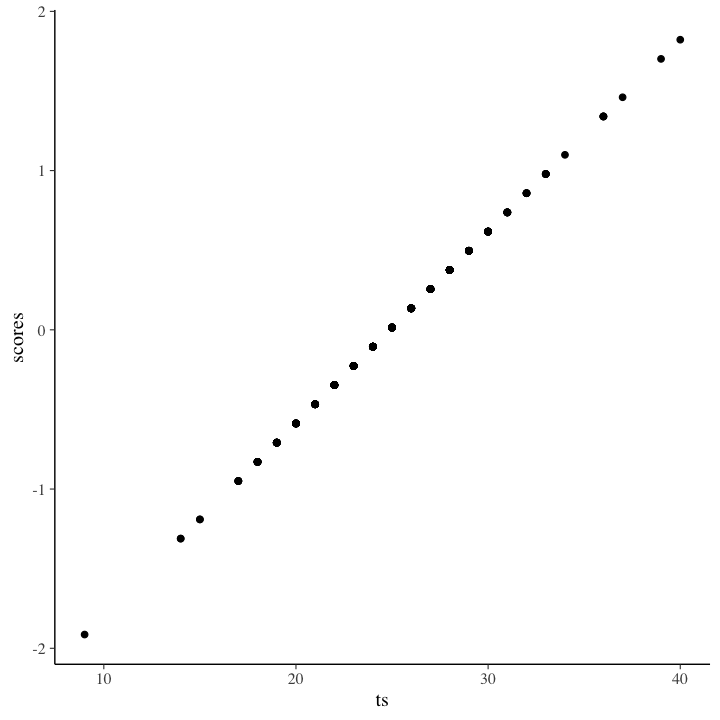

In [17]:
d |> 
  ggplot(aes(x=ts, y=scores)) + 
  geom_point()

Tuttavia, questa conclusione è valida solo se il modello parallelo è giustificato per i dati.  Se esaminiamo l'output di lavaan vediamo che, nel caso presente, questo non è vero.

In [18]:
# report output with fit measures and standardized estimates
out = summary(fit_parallel, fit.measures = TRUE, standardized = TRUE)
print(out)

lavaan 0.6.15 ended normally after 13 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         7
  Number of equality constraints                     5

  Number of observations                           301

Model Test User Model:
                                                      
  Test statistic                               325.899
  Degrees of freedom                                19
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               568.519
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.446
  Tucker-Lewis Index (TLI)                       0.562

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -26

Dunque, per questi dati, il punteggio totale può ovviamente essere calcolato. Ma *non fornisce una misura adeguata del costrutto*. Dunque, il punteggio totale non dovrebbe essere usato nel caso dei dati ottenuti con questo test.

Gli autori adattano ai dati un modello congenerico.

In [19]:
m_congeneric <- 
'
  #all loadings are uniquely estimated
  f1 =~ NA*X4 + X5 + X6 + X7 + X8 + X9
  #constrain factor variance to 1
  f1 ~~ 1*f1
'

In [20]:
# Fit above model
fit_congeneric <- sem(m_congeneric, data=d)

In [21]:
parameterEstimates(fit_congeneric, standardized = TRUE) %>%
  dplyr::filter(op == "=~") %>%
  dplyr::select(
    "Latent Factor" = lhs,
    Indicator = rhs,
    B = est,
    SE = se,
    Z = z,
    "p-value" = pvalue,
    Beta = std.all
  ) %>%
  knitr::kable(
    digits = 3, booktabs = TRUE, format = "markdown",
    caption = "Factor Loadings"
  )



Table: Factor Loadings

|Latent Factor |Indicator |     B|    SE|      Z| p-value|  Beta|
|:-------------|:---------|-----:|-----:|------:|-------:|-----:|
|f1            |X4        | 0.963| 0.059| 16.274|   0.000| 0.824|
|f1            |X5        | 1.121| 0.067| 16.835|   0.000| 0.846|
|f1            |X6        | 0.894| 0.058| 15.450|   0.000| 0.792|
|f1            |X7        | 0.195| 0.071|  2.767|   0.006| 0.170|
|f1            |X8        | 0.185| 0.063|  2.938|   0.003| 0.180|
|f1            |X9        | 0.278| 0.065|  4.245|   0.000| 0.258|

Si noti che le saturazioni fattoriali standardizzate sono molto diverse tra loro, suggerendo che il punteggio del costrutto si relaziona in modo diverso con ciascun item e che sarebbe inappropriato stimare il punteggio del costrutto assegnando un peso unitario agli item.

McNeish e Wolf (2020) calcolano poi i punteggi fattoriali del modello congenerico.

In [22]:
scores_cong <- lavPredict(fit_congeneric, method="regression")
d$scores_cong <- as.numeric(scores_cong)

Il grafico seguente mostra la relazione tra i punteggi fattoriali e il punteggio totale.

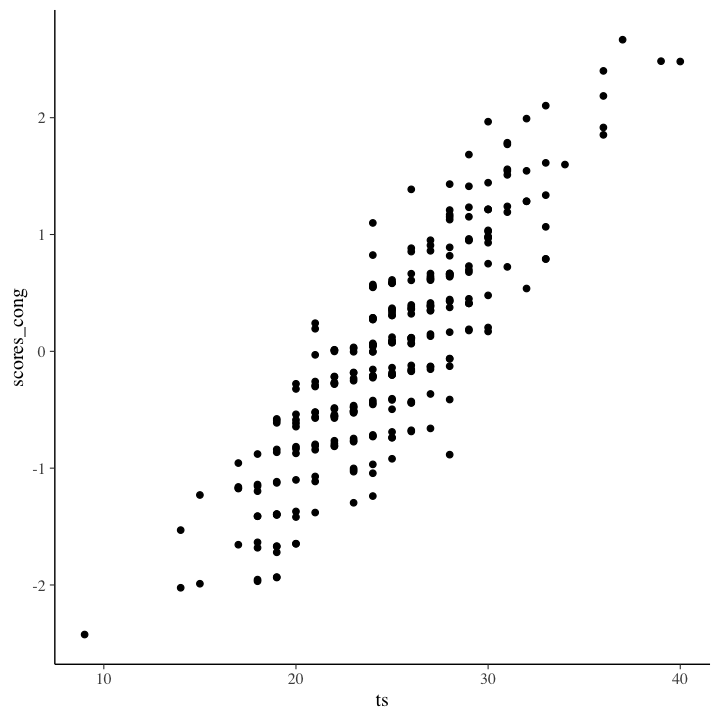

In [23]:
d |> 
  ggplot(aes(x=ts, y=scores_cong)) + 
  geom_point()

Nel caso presente, il coefficiente di determinazione tra punteggio totale e punteggi fattoriali è 0.77.

In [24]:
cor(d$ts, d$scores_cong)^2

[1] 0.765992

Secondo gli autori, ciò significa che due persone con un punteggio totale identico potrebbero avere punteggi di modello congenerico potenzialmente diversi perché hanno raggiunto il loro particolare punteggio totale approvando item diversi. Poiché il modello congenerico assegna pesi diversi agli item, ciascun item contribuisce in modo diverso al punteggio fattoriale del modello congenerico, il che non è vero per il punteggio totale. 

Si noti che, per i dati di Holzinger and Swineford (1939), neppure un modello congenerico ad un fattore si dimostra adeguato.

In [25]:
out = summary(fit_congeneric, fit.measures = TRUE, standardized = TRUE)
print(out)

lavaan 0.6.15 ended normally after 16 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        12

  Number of observations                           301

Model Test User Model:
                                                      
  Test statistic                               115.366
  Degrees of freedom                                 9
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               568.519
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.808
  Tucker-Lewis Index (TLI)                       0.680

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2575.664
  Loglikelihood unrestricted model (H1)      -25

Trascurando le considerazioni sulla struttura fattoriale e esaminando, per esempio, unicamente il coefficiente omega, finiamo per trovare una risposta accettabile, ma sbagliata.

Loading required namespace: GPArotation



Omega 
Call: omegah(m = m, nfactors = nfactors, fm = fm, key = key, flip = flip, 
    digits = digits, title = title, sl = sl, labels = labels, 
    plot = plot, n.obs = n.obs, rotate = rotate, Phi = Phi, option = option, 
    covar = covar)
Alpha:                 0.72 
G.6:                   0.76 
Omega Hierarchical:    0.55 
Omega H asymptotic:    0.65 
Omega Total            0.84 

Schmid Leiman Factor loadings greater than  0.2 
      g  F1*  F2*   F3*   h2   u2   p2
X4 0.73            0.68 1.00 0.00 0.53
X5 0.96                 0.92 0.08 1.00
X6 0.69            0.22 0.54 0.46 0.90
X7           0.56       0.33 0.67 0.03
X8           0.75       0.59 0.41 0.05
X9 0.22      0.49       0.29 0.71 0.16

With Sums of squares  of:
   g  F1*  F2*  F3* 
2.02 0.00 1.11 0.54 

general/max  1.82   max/min =   257.39
mean percent general =  0.44    with sd =  0.43 and cv of  0.97 
Explained Common Variance of the general factor =  0.55 

The degrees of freedom are 0  and the fit is  0 
The numbe

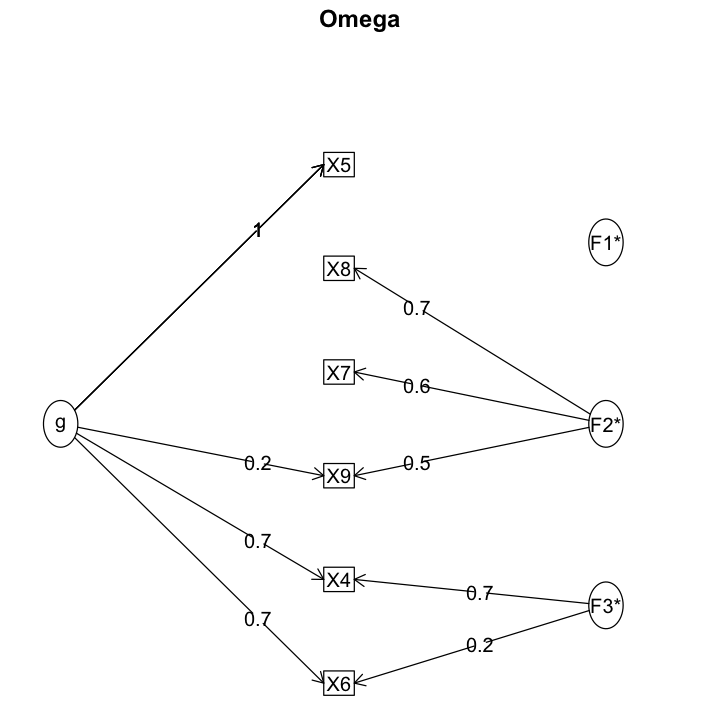

In [26]:
psych::omega(d[, 1:6])

È invece necessario ipotizzare un modello congenerico a due fattori.

In [27]:
m2f_cong <- '
  # all loadings are uniquely estimated on each factor
  f1 =~ NA*X4 + X5 + X6
  f2 =~ NA*X7 + X8 + X9
  
  # constrain factor variancse to 1
  f1 ~~ 1*f1
  f2 ~~ 1*f2
  
  # estimate factor covariance
  f1 ~~ f2
'

In [28]:
# Fit above model
fit_2f_congeneric <- sem(m2f_cong, data=d)

Solo questo modello fornisce un adattamento adeguato ai dati.

In [29]:
out = summary(fit_2f_congeneric, fit.measures = TRUE, standardized = TRUE)
print(out)

lavaan 0.6.15 ended normally after 18 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        13

  Number of observations                           301

Model Test User Model:
                                                      
  Test statistic                                14.736
  Degrees of freedom                                 8
  P-value (Chi-square)                           0.064

Model Test Baseline Model:

  Test statistic                               568.519
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.988
  Tucker-Lewis Index (TLI)                       0.977

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -2525.349
  Loglikelihood unrestricted model (H1)      -25

## Attenuazione

Un altro tema importante associato alla discussione sulla struttura fattoriale e l'attenibilità è quello dell'attenuazione. All'aumentare dell'errore di misurazione, la correlazione tra due variabili tende a diminuire. L'errore di misurazione, dunque, "maschera" l'associazione esistente tra le variabili. Tale fenomeno va sotto il nome di *attenuazione*.

Lord e Novick (1967) notano che, volendo determinare la relazione
esistente tra due costrutti, uno psicologo può costruire opportune scale
per misurarli. Se la relazione tra queste scale è lineare, allora il
grado di associazione tra le scale può essere misurato dal coefficiente
di correlazione. Le scale, però, contengono una componente di errore e,
quindi, la correlazione empirica tra le due scale assume un valore
minore della "reale" correlazione tra i costrutti. In tali circostanze,
possono essere usate opportune formule per stimare il valore della
correlazione disattenuata tra i tratti latenti.

Si può dimostrare che la correlazione tra i punteggi veri di due
costrutti, $T_y$ e $T_y$, può essere espressa nei termini della
correlazione $\rho_{XY}$ tra i punteggi osservati $X$ e $Y$, e nei
termini dei coefficienti di attenibilità $\rho_{XX^\prime}$, $\rho_{YY^\prime}$ dei
due test:

$$
\begin{equation}
\rho(T_X, T_Y)  = \frac{\rho_{XY}}{\sqrt{\rho_{XX^\prime} \rho_{YY^\prime}}}
\end{equation}
$$(eq-3-9-6)

Inoltre, può essere dimostrato che la correlazione tra i punteggi di un test e i punteggi veri di un secondo test può essere espressa nei termini delle correlazioni tra i punteggi osservati dei due test e del coefficiente di attendibilità del secondo test:

$$
\begin{equation}
\rho(X, T_Y)  = \frac{\rho_{XY}}{\sqrt{\rho_{YY^\prime}}}.
\end{equation}
$$(eq-3-9-7)

### Correlazioni disattenuate

Le {eq}`eq-3-9-6` e {eq}`eq-3-9-7` consentono di calcolare le cosiddette
*correlazioni disattenuate*. L'idea è che le correlazioni tra i punteggi
veri di due test sono sottostimate dalle correlazioni tra i punteggi
osservati dei test, a causa dell'errore di misura. Se le attendibilità
dei test sono conosciute, le {eq}`eq-3-9-6` e {eq}`eq-3-9-7` possono essere usate per stimare le correlazioni tra i corrispondenti punteggi veri. La teoria dell'attenuazione
costituisce un'ulteriore applicazione del coefficiente di attendibilità
nell'ambito della teoria classica dei test.

Le correlazioni disattenuate sono state usate già a partire dal 1904 da
Spearman. Nell'esempio di Spearman, $X$ era una misura di
discriminazione dell'altezza di un suono (*pitch discrimination*) e $Y$
era una misura di intelligenza fornita da un insegnante. La correlazione
tra queste due misure era $\hat{\rho}_{XY}=0.38$. Le attendibilità delle
due misure erano pari a, rispettivamente, $\hat{\rho}_{XX'}= 0.25$ e
$\hat{\rho}_{YY'}= 0.55$. In base
alla {eq}`eq-3-9-7`

$$
\rho(X, T_Y)  = \frac{\rho_{XY}}{\sqrt{\rho_{YY^\prime}}}
$$

la correlazione predetta tra i valori veri di pitch discrimination e i valori empirici dell'intelligenza è

$$
\hat{\rho}(X, T_Y)  =\frac{0.38}{\sqrt{0.25}}=0.76.
$$

In base alla {eq}`eq-3-9-6`

$$
\rho(T_X, T_Y)  = \frac{\rho_{XY}}{\sqrt{\rho_{XX'} \rho_{YY'}}}
$$

la correlazione tra i valori veri di pitch discrimination e i valori veri
dell'intelligenza è

$$
\hat{\rho}(T_X, T_Y)  =\frac{0.38}{\sqrt{0.25 \times 0.55}}=1.025.
$$

Si noti come i limiti di questa procedura emergano già dall'esempio
fornito da Spearman: le correlazioni disattenuate possono facilmente
produrre una sovrastima.

Questa formula originò una controversia tra Charles Spearman e Karl
Pearson. In un suo articolo del 1904 (lo stesso anno dei famosi articoli
di Spearman), Pearson riportò diverse correlazioni nell'intorno di 0.5
che riguardavano la misurazione empirica di caratteristiche quali la
vivacità e l'introspezione. Spearman criticò l'articolo di Pearson
affermando che le osservazioni probabilmente contenevano un sostanziale
errore di misurazione, il che determinava il fatto che fossero così
basse. Le corrispondenti correlazioni disattenuate erano, secondo
Spearman, probabilmente molto più alte. Tale critica venne del tutto
ignorata da Pearson sulla base del fatto che la formula di Spearman
poteva condurre a correlazioni maggiori di uno. Inoltre, Pearson non
accettava i riferimenti a quantità inosservabili. Spearman, d'altra
parte, eseguì diversi studi su variabili psicologiche alle quali applicò
la sua formula per le correlazioni disattenuate. In molti casi, trovò
che le correlazioni disattenuate erano vicine ad uno. Questo suggeriva
che tali variabili psicologiche erano indicatori dello stesso fenomeno.
Queste considerazioni spinsero Spearman a procedere in questa direzione,
giungendo ad inventare l'analisi fattoriale così com'è riportata
nell'articolo del 1904 *"General intelligence", objectively determined
and measured*.

McDonald (1999) afferma che le correlazioni disattenuate devono essere
usate con cautela. Un metodo migliore per calcolare le correlazioni tra
le variabili latenti (ovvero, le correlazioni non "inquinate" dagli
errori di misura) è quello di costruire un modello di equazioni
strutturali nel quale diverse ipotesi possono essere direttamente
verificate, compresa quella della correlazione tra le variabili latenti.

## Attendibilità e scala di misura

McDonald (2013) fa notare che i coefficienti $\omega$ e $\alpha$, ma non
il coefficiente di Spearman-Brown, dipendono dalla scala di misura degli
item. Stimare $\omega$ utilizzando una matrice di correlazione anziché
una matrice di varianze e di covarianze è equivalente a stimare il
coefficiente di attendibilità di una somma di item standardizzati. Il
risultato ottenuto mediante $\omega$ e $\alpha$ non si generalizza però
al caso in cui si voglia valutare l'attendibilità del punteggio totale
di un test calcolato sui valori grezzi degli item.

Il modello ad un fattore comune non dipende dall'unità di misura degli
indicatori e può essere adattato sia ad una matrice di correlazione sia
ad una matrice di varianze e di covarianze. Il calcolo dei coefficienti
$\omega$ e $\alpha$, invece, deve essere fatto sulla soluzione trovata
utilizzando una matrice di varianze e di covarianze.

## Quale indice usare?

L'indice di attendibilità più diffuso in letteratura è il coefficiente
$\alpha$ di Cronbach. Affinché $\alpha$ fornisca una stima
dell'attendibilità del test, però, gli item devono essere
$\tau$-equivalenti. Il modello di $\tau$-equivalenza richiede
l'unidimensionalità del tratto latente. In pratica, tale assunzione
viene spesso violata, dato che la maggior parte dei test, oltre ad un
fattore generale, misurano anche altri fattori. Anche nel caso di un
test unidimensionale, le comunalità degli item non sono mai uguali tra
loro, violando così l'assunzione di $\tau$-equivalenza. In tali
circostanze, se risulta soddisfatta l'assunzione di incorrelazione degli
errori, il coefficiente $\alpha$ sottostima l'attendibilità del test. Se
invece l'assunzione di incorrelazione degli errori non risulta
soddisfatta, allora il coefficiente $\alpha$ sovrastima l'attendibilità
del test. Per tali ragioni, l'utilità del coefficiente $\alpha$ di
Cronbach è molto limitata e, in generale, è preferibile usare il
coefficiente $\omega$ (McDonald, 1999). Altre alternative sono gli
indici $glb$ (*Greatest Lower Bound*; si veda, ad esempio, Ten Berge e
Sočan, 2004) e $\beta$ (Revelle, 1979).

